In [1]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch, random, pathlib

ckpt_dir = "../models/checkpoints/dreambooth_accident_v1"   # the folder you just saved
token    = "<accident>"                                  # the placeholder you trained

pipe = StableDiffusionPipeline.from_pretrained(
            ckpt_dir,
            torch_dtype=torch.float16
        ).to("cuda")

# optional quality / speed extras
pipe.enable_xformers_memory_efficient_attention()
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)


/home/hwen/285_AD_kernel/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]


In [2]:
prompt = f"A high-resolution dash-cam photo of a {token} on a sunny highway"
image  = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
image

 44%|████▍     | 22/50 [00:05<00:07,  3.68it/s]


KeyboardInterrupt: 

In [ ]:
base = StableDiffusionPipeline.from_pretrained(
           "runwayml/stable-diffusion-v1-5",
           torch_dtype=torch.float16
       ).to("cuda")
base.enable_xformers_memory_efficient_attention()

Fine-tuned:


100%|██████████| 50/50 [00:13<00:00,  3.84it/s]


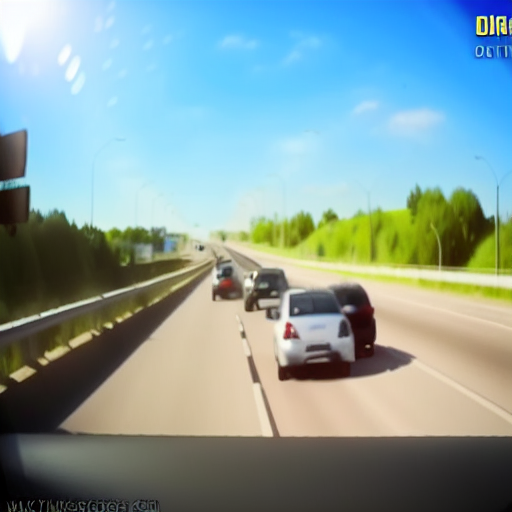

Vanilla SD 1.5:


100%|██████████| 50/50 [00:13<00:00,  3.67it/s]


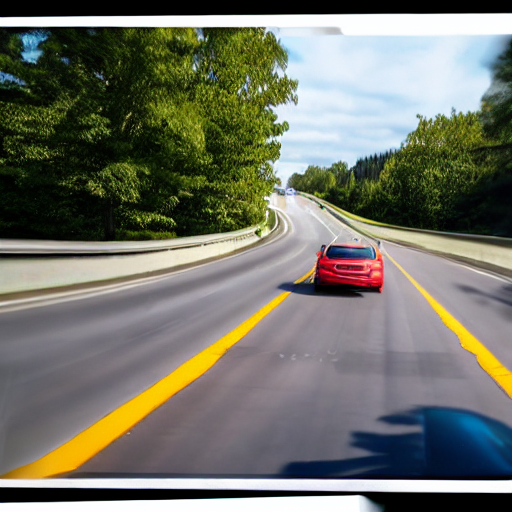

In [7]:
print("Fine-tuned:"); display(pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0])
print("Vanilla SD 1.5:"); display(base(prompt, num_inference_steps=50, guidance_scale=7.5).images[0])